In [ ]:
# TASK 1 : Titanic Survival Prediction
# Bactch : Aug 
# Domain : Data Science 
# Predictions for the survival rate of passengers

In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
import os 
os.chdir("C:\\Users\\Admin\\OneDrive\\Documents\\dataset")

In [55]:
df = pd.read_csv('Titanic-Dataset.csv')

In [169]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
######## Basic Info ########

In [65]:
df.shape

(891, 12)

In [63]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
###########  Data Cleaning #######
df['Age'].fillna(df['Age'].median())
df['Embarked'].fillna(df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [73]:
df.drop(['Cabin','Ticket','Name','PassengerId'],axis =1 ,inplace = True)

In [81]:
#### Label Encoding for Categorical Data########
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
df['Sex'] = Label.fit_transform(df['Sex']) # male = 1, female = 0

df['Embarked'] = Label.fit_transform(df['Embarked'])

In [95]:
df_plot = df.copy()
df_plot['Sex'] = df_plot['Sex'].map({0: 'Female', 1: 'Male'})
df_plot['Pclass'] = df_plot['Pclass'].map({1: 'First Class', 2: 'Second Class', 3: 'Third Class'})
df_plot['Survived'] = df_plot['Survived'].map({0: 'Not Survived', 1: 'Survived'})

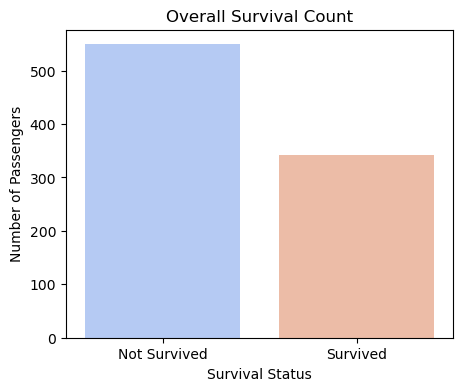

In [167]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived',hue='Survived', data=df_plot, palette='coolwarm')
plt.title("Overall Survival Count")
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.show()

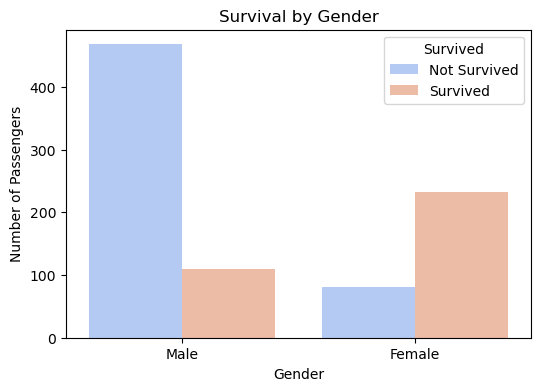

In [101]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df_plot, palette='coolwarm')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.show()

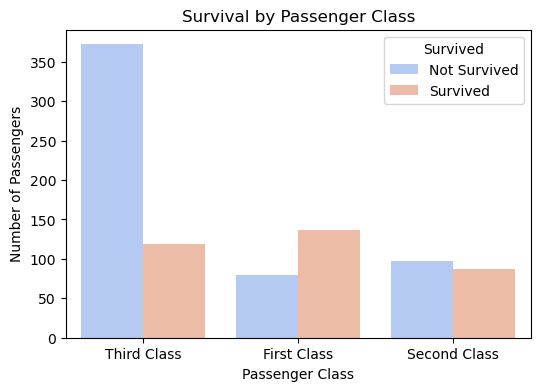

In [103]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df_plot, palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()

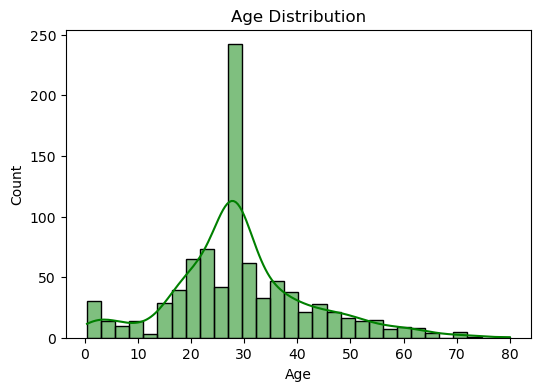

In [93]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title("Age Distribution")
plt.show()

In [107]:
x= df.drop('Survived', axis = 1)
y = df['Survived']

In [109]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [111]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
##########  split Data ############

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [117]:
########## Training ######
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [121]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [153]:
########## Accurcay############
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [129]:
##############sample################
passenger = np.array([[3, 1, 22.0, 1, 0, 7.25, 0]])  

sample_prediction = model.predict(passenger)
print("Sample Passenger Survival Prediction:", "Survived" if sample_prediction[0] == 1 else "Not Survived")

Sample Passenger Survival Prediction: Not Survived


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
################ function to test multiple models #################

In [163]:
def my_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        'Model': model.__class__.__name__,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'F1 Score': round(f1_score(y_test, y_pred), 4)
    }


                    Model  Accuracy  Recall  Precision  F1 Score
0  RandomForestClassifier    0.8212  0.7432     0.8088    0.7746
1  DecisionTreeClassifier    0.7821  0.7703     0.7215    0.7451
2    KNeighborsClassifier    0.7207  0.5405     0.7143    0.6154
3                     SVC    0.6592  0.2568     0.7600    0.3838
4      LogisticRegression    0.8101  0.7432     0.7857    0.7639


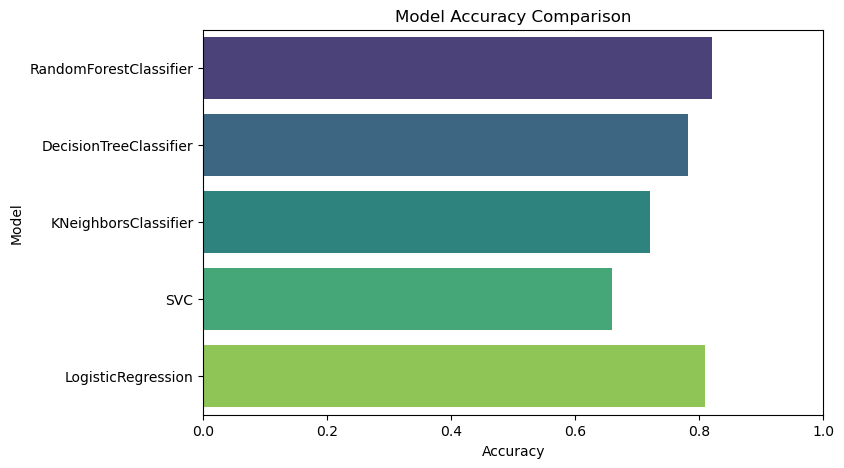

In [165]:
models = [
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    SVC(probability=True, random_state=42),
    LogisticRegression(max_iter = 200)
]

# Step 5: Evaluate each model
results = []
for m in models:
    results.append(my_model(m, x_train, x_test, y_train, y_test))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Step 6: Display results table
print(results_df)

# Step 7: Plot accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model',hue='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()